In [141]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import ta
import itertools
import tqdm 
from multiprocessing import Pool 
from defs import *

In [183]:
ex = ccxt.binance()
from_ts = ex.parse8601('2018-05-18 00:00:00')
ohlcv_list = []
ohlcv = ex.fetch_ohlcv('BTC/USDT', '1d', since=from_ts, limit=1000)
ohlcv_list.append(ohlcv)
while True:
    from_ts = ohlcv[-1][0]
    new_ohlcv = ex.fetch_ohlcv('BTC/USDT', '1d', since=from_ts, limit=1000)
    ohlcv.extend(new_ohlcv)
    if len(new_ohlcv)!=1000:
    	break

In [184]:
df = pd.DataFrame(ohlcv, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.set_index('date', inplace=True)
df = df.sort_index(ascending=True)

df.to_pickle("./BTC_USDT_1d.pkl") 

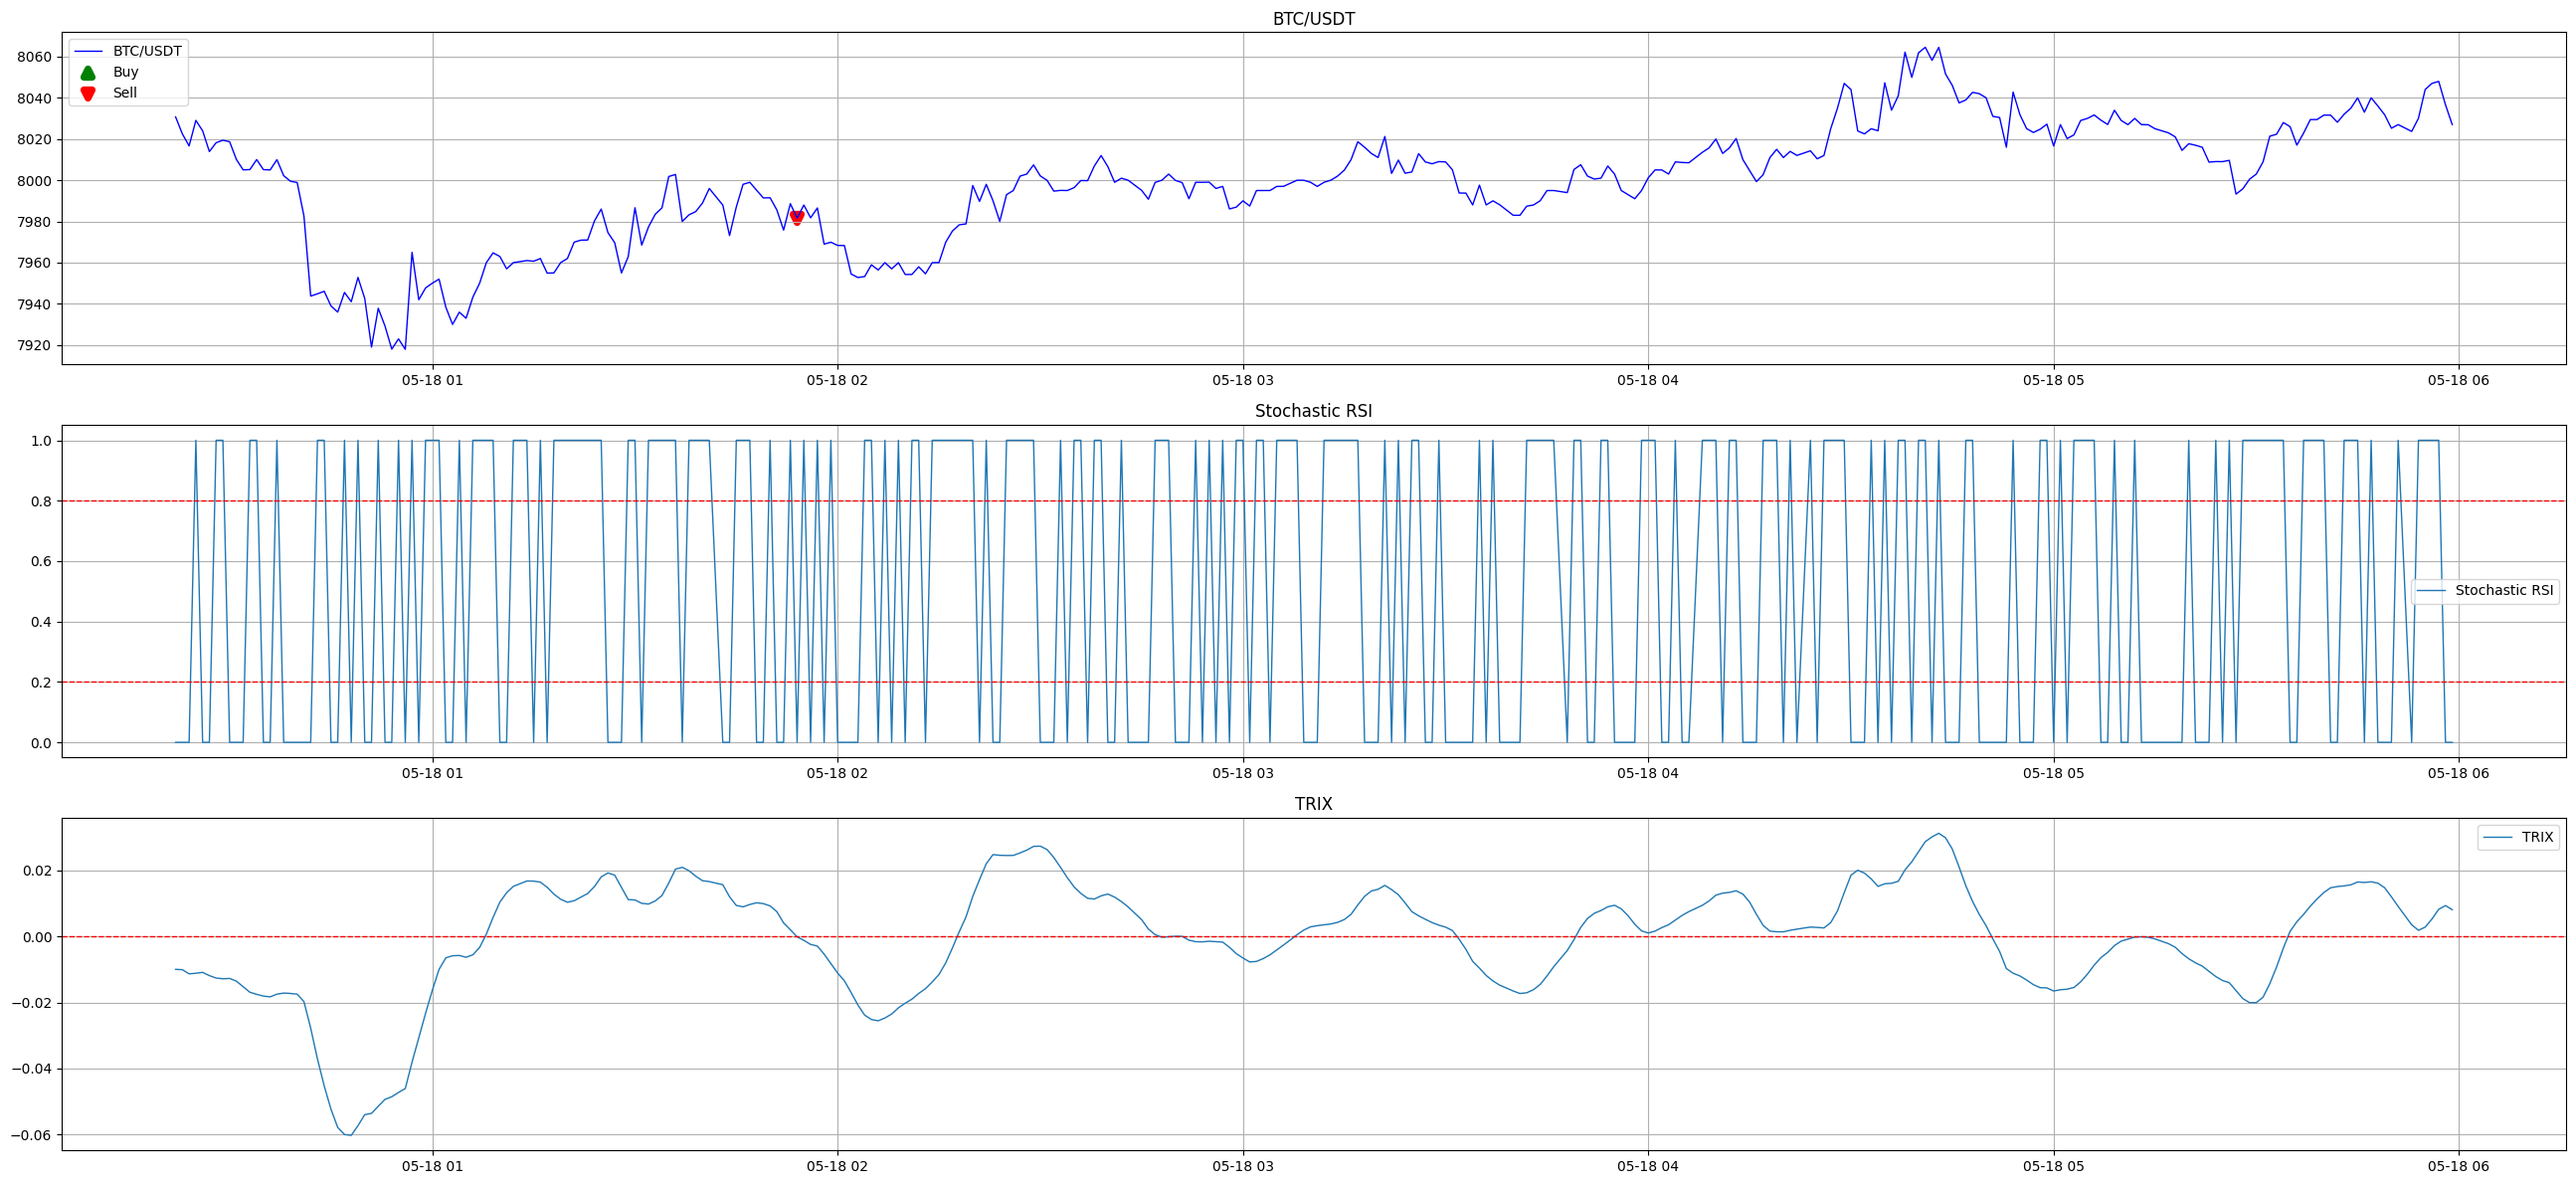

ZeroDivisionError: division by zero

In [146]:
df = pd.read_pickle("./BTC_USDT.pkl")

df = df.iloc[:360]

windows = [2, 8]

ta_stochrsi = ta.momentum.StochRSIIndicator(close=df['close'], window=windows[0], smooth1=3, smooth2=3)
df['stoch_rsi'] = ta_stochrsi.stochrsi()
#df['fast_k'] = ta_stochrsi.stochrsi_k()
#df['fast_d']= ta_stochrsi.stochrsi_d()

ta_trix= ta.trend.TRIXIndicator(close=df['close'], window=windows[1])
df['trix'] = ta_trix.trix()

df.dropna(inplace=True)

buy_condition = (df['stoch_rsi'] >= 0.8) & (df['stoch_rsi'].shift(1) < 0.8) & (df['trix'] >= 0.0) & (df['trix'].shift(1) < 0.0)   
sell_condition = (df['stoch_rsi'] < 0.2) & (df['stoch_rsi'].shift(1) >= 0.2) & (df['trix'] < 0.0) & (df['trix'].shift(1) >= 0.0)  
#buy_condition = (df['stoch_rsi'] < 0.8) & (df['trix'] > 0.0) 
#sell_condition = (df['stoch_rsi'] > 0.2) & (df['trix'] < 0.0) 
# Add columns
df['signals_buy'] = df.loc[buy_condition, 'close']
df['signals_sell'] = df.loc[sell_condition, 'close']

fig, axes = plt.subplots(nrows=3, figsize=(26,12))

axes[0].plot(df.index, df['close'], label = 'BTC/USDT' ,linewidth=1 ,color='blue')
axes[0].scatter(df.index, df['signals_buy'] , label = 'Buy' , marker = '^', color='green', alpha=1, linewidths=5)
axes[0].scatter(df.index, df['signals_sell'] , label = 'Sell' , marker = 'v', color='red', alpha=1, linewidths=5)
axes[0].set_title('BTC/USDT')
axes[0].legend()
axes[0].grid()

axes[1].plot(df.index, df['stoch_rsi'], label='Stochastic RSI', linewidth=1)
axes[1].set_title('Stochastic RSI')
axes[1].axhline(0.8, lw=1, ls='--', c='red')
axes[1].axhline(0.2, lw=1, ls='--', c='red')
axes[1].legend()
axes[1].grid()

axes[2].plot(df.index, df['trix'], label='TRIX', linewidth=1)
axes[2].set_title('TRIX')
axes[2].axhline(0.0, lw=1, ls='--', c='red')
axes[2].legend()
axes[2].grid()


plt.tight_layout()
plt.show()

buys_list = df['signals_buy'].dropna().to_list()
sells_list = df['signals_sell'].dropna().to_list()

print(f'Difference between average BUY and SELL signal:{(sum(sells_list) / len(sells_list)) - (sum(buys_list) / len(buys_list))}, BUY events:{len(buys_list)}, SELL events:{len(sells_list)}')

In [73]:
# Create lists with ranges of SMAs values for combinations calculation

# Short SMA list
windows_stoch_rsi = list(range(2,61))
# Long SMA list
windows_trix = list(range(2,61))
# Calculate all of the combinations
combinations = list(itertools.product(windows_stoch_rsi, windows_trix))

In [142]:
if __name__ == '__main__':
   with Pool(8) as p:
      results_list = list(tqdm.tqdm(p.imap(simmulate_combinations, combinations), total=len(combinations)))
      results_df = pd.DataFrame(results_list)

100%|██████████| 3481/3481 [00:08<00:00, 413.66it/s]


In [145]:
results_df.nlargest(50, 'average_difference')   

,average_difference,window_stoch_rsi,window_trix
6,65.861217,2,8
3,34.913513,2,5
0,10.158062,2,2
4,0.555940,2,6
1,-28.121363,2,3
7,-42.068586,2,9
5,-90.306975,2,7
2,-274.936248,2,4
8,NaN,2,10
9,NaN,2,11
